# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import squarify
import warnings
warnings.filterwarnings('ignore')


# Import data

In [2]:
transactions = pd.read_csv('Du_lieu_cung_cap/Transactions.csv')
products = pd.read_csv('Du_lieu_cung_cap/Products_with_Categories.csv')

In [3]:
# print table info
print('Transaction table')
print(transactions.info())
print(f'\nProducts table')
print(products.info())

Transaction table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_number  38765 non-null  int64 
 1   Date           38765 non-null  object
 2   productId      38765 non-null  int64 
 3   items          38765 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB
None

Products table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    167 non-null    int64  
 1   productName  167 non-null    object 
 2   price        167 non-null    float64
 3   Category     167 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB
None


=> Data ban đầu không có phần tử null nào, nên không cần xử lý null

In [4]:
# review first rows of tables
print('Transaction table')
print(transactions.head())
print(f'\nProducts table')
print(products.head())

Transaction table
   Member_number        Date  productId  items
0           1808  21-07-2015          1      3
1           2552  05-01-2015          2      1
2           2300  19-09-2015          3      3
3           1187  12-12-2015          4      3
4           3037  01-02-2015          2      1

Products table
   productId       productName  price         Category
0          1    tropical fruit    7.8       Fresh Food
1          2        whole milk    1.8            Dairy
2          3         pip fruit    3.0       Fresh Food
3          4  other vegetables    0.8       Fresh Food
4          5        rolls/buns    1.2  Bakery & Sweets


# Clean data

In [5]:
# check null values
print('Transaction table')
print(transactions.isnull().sum())
print(f'\nProducts table')
print(products.isnull().sum())

Transaction table
Member_number    0
Date             0
productId        0
items            0
dtype: int64

Products table
productId      0
productName    0
price          0
Category       0
dtype: int64


In [6]:
# check duplicated values
print('Transaction table')
print(transactions.duplicated().sum())
print(f'\nProducts table')
print(products.duplicated().sum())

Transaction table
244

Products table
0


=> Số lượng duplicate khá thấp so với tổng số lượng data, do đó có thể xóa bỏ các dòng duplicate để giảm thiểu việc xử lý dữ liệu. Lý do có thể là do người dùng nhập thông tin nhiều lần, lỗi nhập liệu,..

In [7]:
# drop duplicated values
transactions.drop_duplicates(inplace=True)

In [8]:
# convert to date
string_to_date = lambda x : datetime.strptime(x, "%d-%m-%Y").date()
transactions['Date'] = transactions['Date'].apply(string_to_date)
transactions['Date'] = transactions['Date'].astype('datetime64[ns]')

* Cột Date là kiểu object nên ta sẽ chuyển về kiểu datetime

# Merge 2 datasets

Merge 2 bảng dựa vào productId

In [9]:
df = pd.merge(transactions, products, left_on='productId', right_on='productId')
df.head()

,Member_number,Date,productId,items,productName,price,Category
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food
1,4119,2015-02-12,1,3,tropical fruit,7.8,Fresh Food
2,3962,2015-09-18,1,2,tropical fruit,7.8,Fresh Food
3,1088,2015-11-30,1,2,tropical fruit,7.8,Fresh Food
4,1863,2015-08-04,1,1,tropical fruit,7.8,Fresh Food


# Data Exploration

## Basic check

In [10]:
print(f"Transactions are from {df['Date'].min()} to {df['Date'].max()}")
print(f"Number of unique products: {df['productId'].nunique()}")
print(f"Number of unique members: {df['Member_number'].nunique()}")


Transactions are from 2014-01-01 00:00:00 to 2015-12-30 00:00:00
Number of unique products: 167
Number of unique members: 3898


* Tạo cột sales là tổng tiền các sản phẩm

In [11]:
# create new columns: sales = items x price
df['sales'] = df['items'] * df['price']

In [12]:
# define num & cat columns
num_cols = ['items','price', 'sales']
cat_cols = ['Category', 'productName']

In [13]:
# check unique values of num columns
for col in num_cols:
    if df[col].nunique() < 15:
        print(col, df[col].nunique(), df[col].unique())
    else:
        print(col, df[col].nunique())

items 3 [3 2 1]
price 90
sales 227


=> Số lượng items được thường chỉ là 1 2 hoặc 3 sản phẩm

In [14]:
# check unique values of category column
for col in cat_cols:
    if df[col].nunique() < 15:
        print(col, df[col].nunique(), df[col].unique())
    else:
        print(col, df[col].nunique())

Category 11 ['Fresh Food' 'Dairy' 'Bakery & Sweets' 'Household & Hygiene' 'Beverages'
 'Frozen & Processed Food' 'Pantry Staples' 'Specialty & Seasonal'
 'Pet Care' 'Personal Care' 'Snacks']
productName 167


=> có 167 sản phẩm tương ứng với 11 Loại sản phẩm

<Axes: xlabel='sales', ylabel='Density'>

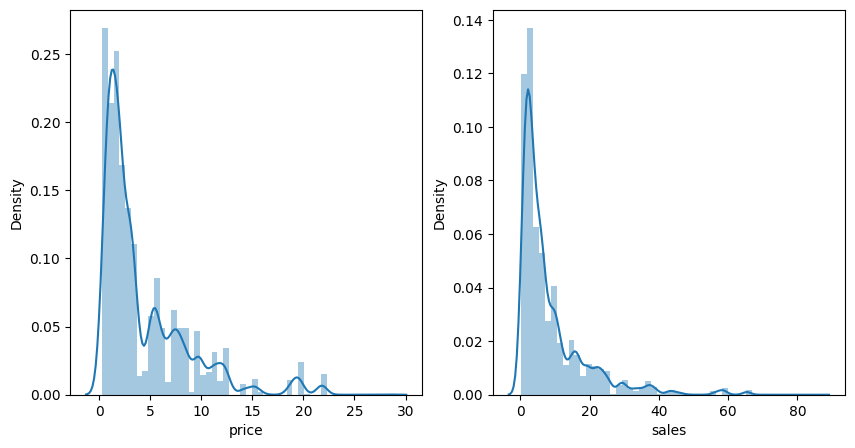

In [15]:
# distribution of price & sales
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df['price'])

plt.subplot(1,2,2)
sns.distplot(df['sales'])


=> Trong tổng các giao dịch thì tỉ lệ khách hàng có giá trị nhỏ lẻ là chiếm đa số, giảm dần về phía giá trị cao.

## Overview

In [16]:
df[['items','price','sales']].describe()

,items,price,sales
count,38521.000000,38521.000000,38521.000000
mean,1.996729,4.305367,8.590893
std,0.817539,4.320088,9.952770
min,1.000000,0.300000,0.300000
25%,1.000000,1.250000,2.400000
50%,2.000000,2.500000,5.200000
75%,3.000000,6.100000,10.500000
max,3.000000,28.500000,85.500000


In [17]:
df[['items','price','sales']].corr()

,items,price,sales
items,1.000000,-0.001630,0.353591
price,-0.001630,1.000000,0.864539
sales,0.353591,0.864539,1.000000


=> Tương quan giữa sales và price khá cao vì đa số các items mua là 1 2 hoặc 3 sảm phẩm.

In [18]:
# create new column: month
df['month_start'] = df['Date'].dt.to_period('M').dt.to_timestamp()

In [19]:
# create new table: items & sales by month
items_monthly = df.groupby('month_start').agg({'items':'sum', 'sales':'sum'}).reset_index()

In [20]:
import matplotlib.dates as mdates

def dual_axis_chart(df, x, y1, y2, title, xlabel, y1_label='Revenue', y2_label='Items Sold'):
    df['month_start'] = df['month_start'].astype(str)

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Bar chart for Items Sold
    sns.barplot(data=df, x=x, y=y2, ax=ax1, color='mediumseagreen', label=y2_label)
    ax1.set_ylabel(y2_label, color='mediumseagreen')
    ax1.tick_params(axis='y', labelcolor='mediumseagreen')

    # Create second y-axis for Revenue
    ax2 = ax1.twinx()
    sns.lineplot(data=df, x=x, y=y1, ax=ax2, color='royalblue', marker='o', label=y1_label)
    ax2.set_ylabel(y1_label, color='royalblue')
    ax2.tick_params(axis='y', labelcolor='royalblue')
 
    
    # beautify legends
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    lines = lines_1 + lines_2
    labels = labels_1 + labels_2
    ax1.legend(lines, labels, loc='upper left')  # You can change the position if needed


    # Titles and layout
    ax1.set_title(title)
    ax1.set_xlabel(xlabel)
    ax1.set_ylim(top=10000)
    fig.tight_layout()
    plt.ylim(bottom=0)
    # rotate x axis
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
    
    plt.show()

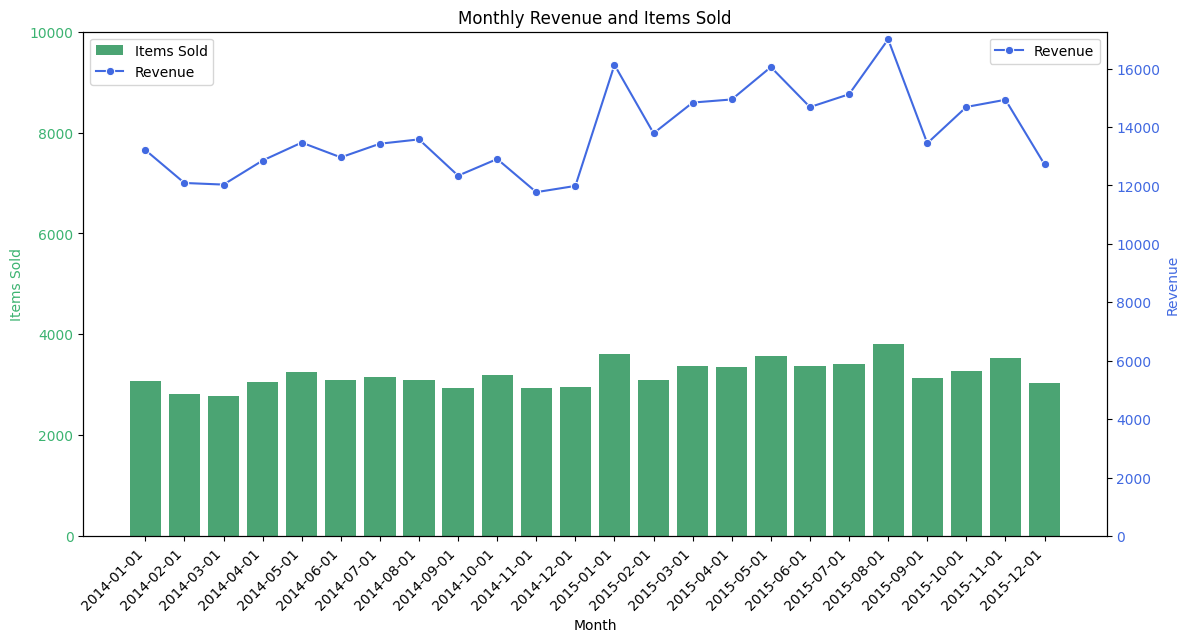

In [21]:
dual_axis_chart(
    df=items_monthly,
    x='month_start',
    y1='sales',
    y2='items',
    title='Monthly Revenue and Items Sold',
    xlabel='Month'
)

=> Doanh thu cao nhất là tháng 1-2015 và tháng 8-2015

Nhận thấy là đầu năm, giữa năm và cuối năm doanh thu cao hơn, nhưng không nhiều so với các tháng còn lại.

In [50]:
# Get top 10 products by items sold per month
top_10_monthly = (
    df.groupby(['month_start', 'productName'])[['items', 'sales']]
    .sum()
    .reset_index()
    .sort_values(['month_start', 'items'], ascending = [True, False])
)
top_10_monthly = top_10_monthly.groupby('month_start').head(10)
top_10_monthly.head(15)

,month_start,productName,items,sales
103,2014-01-01,rolls/buns,172,206.4
136,2014-01-01,whole milk,166,298.8
86,2014-01-01,other vegetables,131,104.8
116,2014-01-01,soda,125,100.0
137,2014-01-01,yogurt,91,200.2
89,2014-01-01,pastry,73,226.3
104,2014-01-01,root vegetables,71,127.8
9,2014-01-01,bottled water,69,34.5
10,2014-01-01,brown bread,67,53.6
133,2014-01-01,whipped/sour cream,67,368.5


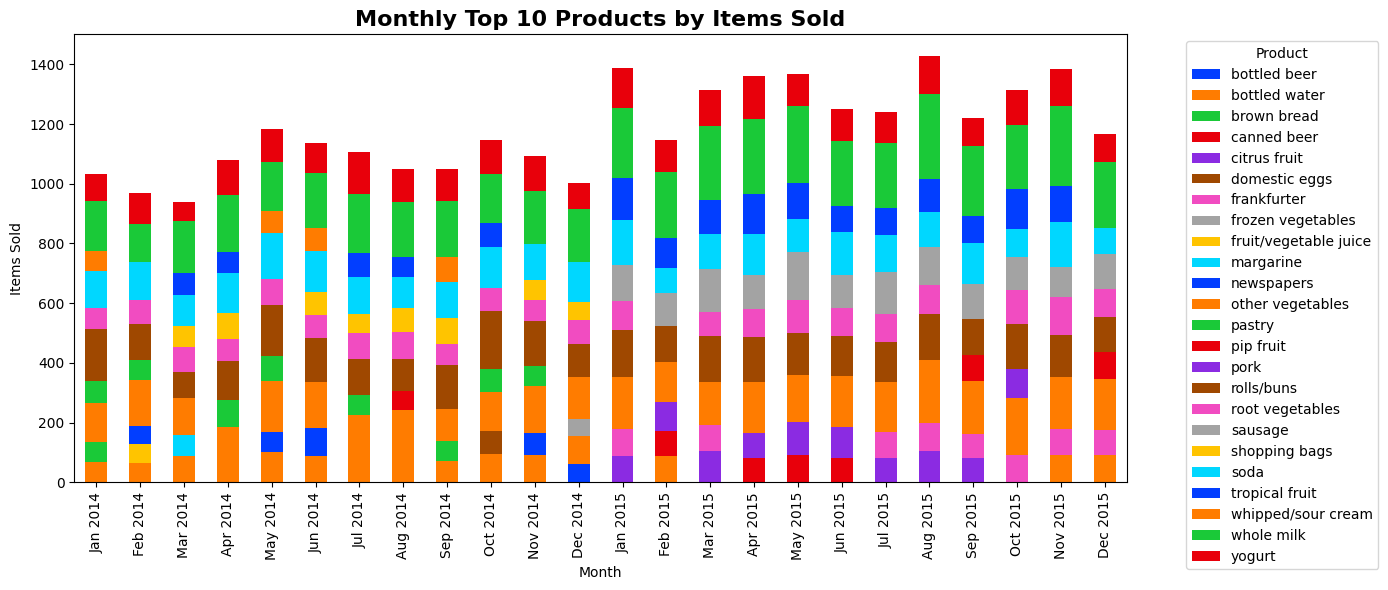

In [ ]:

stacked_df = top_10_monthly.pivot(index='month_start', columns='productName', values='items').fillna(0)

#format the month for readibility
stacked_df.index = stacked_df.index.strftime('%b %Y')

n_colors = len(stacked_df.columns)
colors = sns.color_palette("bright", n_colors)

stacked_df.plot(kind='bar', stacked=True, figsize=(14, 6), color=colors)

plt.title('Monthly Top 10 Products by Items Sold', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Items Sold')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


=> Biểu đồ stack cho biết các tỉ lệ các mặt hàng bán được theo từng tháng.

Nhìn sơ qua thì có thể thấy whole milk, yougurt, soda, domestic eggs, bottled water là những món bán được đồng đều và bán tốt nhất. Có thể tập trung ưu thế vào các mặt hàng này và tìm cách thu hút người mua các mặt hàng khác.

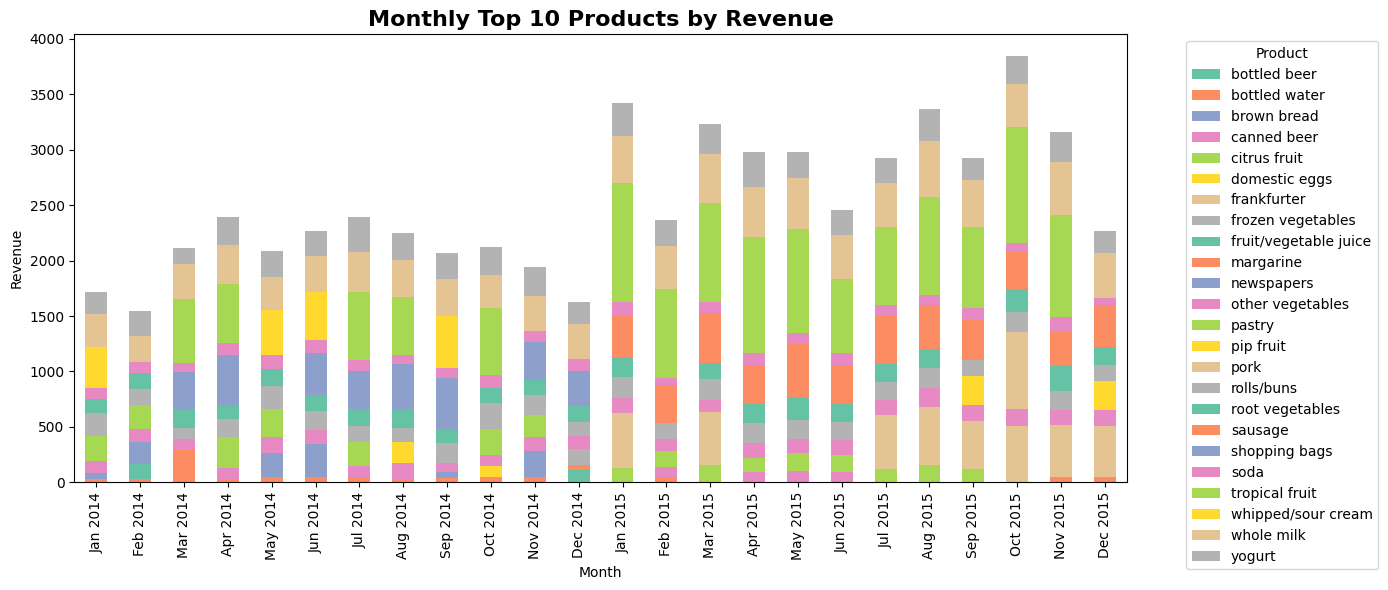

In [61]:

stacked_df = top_10_monthly.pivot(index='month_start', columns='productName', values='sales').fillna(0)

#format the month for readibility
stacked_df.index = stacked_df.index.strftime('%b %Y')

n_colors = len(stacked_df.columns)
colors = sns.color_palette("Set2", n_colors)

stacked_df.plot(kind='bar', stacked=True, figsize=(14, 6), color=colors)

plt.title('Monthly Top 10 Products by Revenue', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


=> Khá bất ngờ về doanh thu của tropical fruits trong 1 vài tháng trong năm 2014 và nhưng tháng trong năm 2015. 

Những mặt hàng khác thì doanh thu khá tương đồng với số lượng bán ra.

In [25]:
# Get top 10 products by category per month
top_10_cat_monthly = (
    df.groupby(['month_start', 'Category'])[['items', 'sales']]
    .sum()
    .reset_index()
    .sort_values(['month_start', 'items'], ascending = [True, False])
)
top_10_cat_monthly = top_10_cat_monthly.groupby('month_start').head(10)
top_10_cat_monthly.head(5)

,month_start,Category,items,sales
3,2014-01-01,Fresh Food,685,3506.70
2,2014-01-01,Dairy,598,2465.64
0,2014-01-01,Bakery & Sweets,585,1918.56
1,2014-01-01,Beverages,460,1472.40
5,2014-01-01,Household & Hygiene,220,1787.20


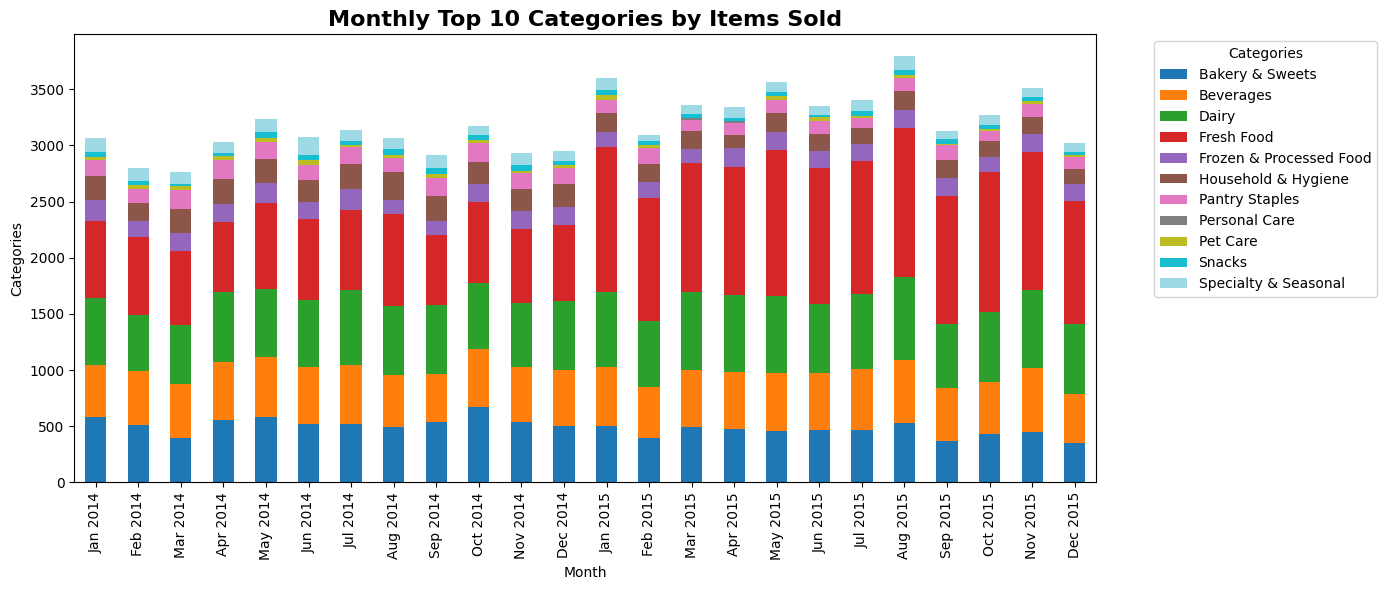

In [26]:
stacked_df = top_10_cat_monthly.pivot(index='month_start', columns='Category', values='items').fillna(0)

#format the month for readibility
stacked_df.index = stacked_df.index.strftime('%b %Y')

stacked_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')

plt.title('Monthly Top 10 Categories by Items Sold', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Categories')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


=> Top 1 về tỷ trọng và ổn định nhất là fresh foods

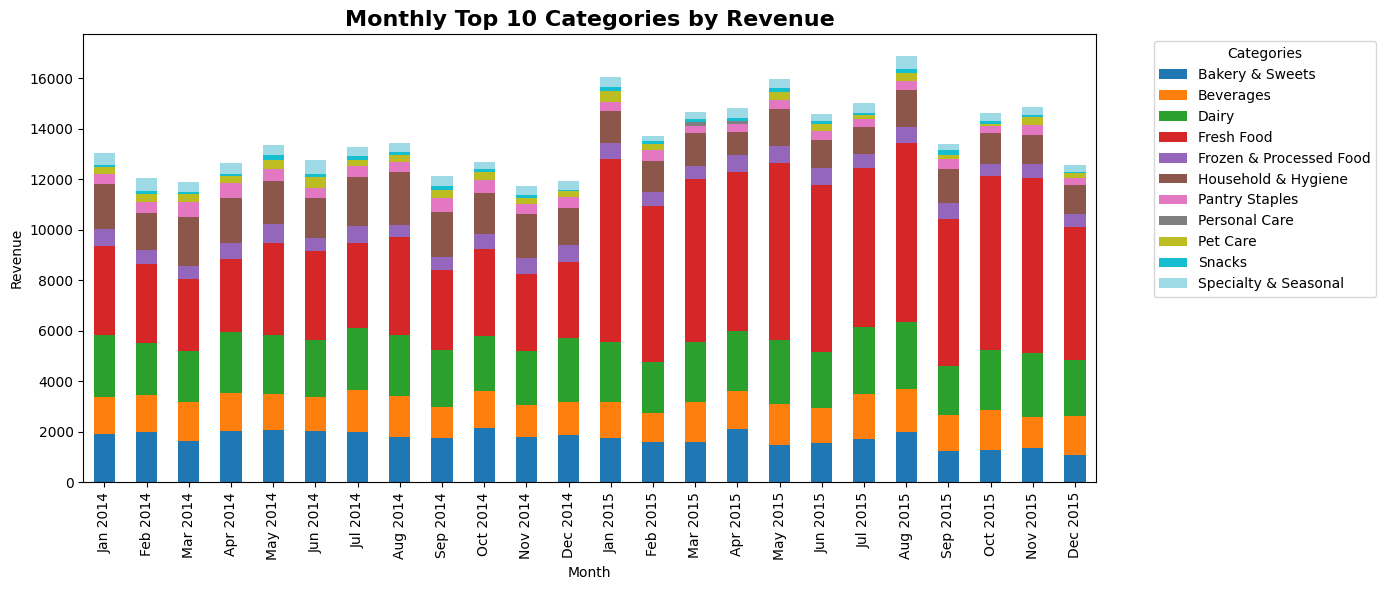

In [27]:
stacked_df = top_10_cat_monthly.pivot(index='month_start', columns='Category', values='sales').fillna(0)

#format the month for readibility
stacked_df.index = stacked_df.index.strftime('%b %Y')

stacked_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')

plt.title('Monthly Top 10 Categories by Revenue', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


"Fresh Food" và "Dairy" vẫn là hai nhóm hàng đóng góp doanh thu lớn nhất và doanh thu cao nhất được ghi nhận vào khoảng tháng 8/2015

=> Nhận xét chung về các mặt hàng, nhóm hàng:
Phân tích chi tiết về 4 biểu đồ:

1. Top 10 Products theo số lượng:
- Số lượng bán ra dao động trong khoảng 800-1400 đơn vị mỗi tháng
- Whole milk và bottled water luôn duy trì vị trí dẫn đầu về số lượng
- Các sản phẩm thiết yếu như brown bread, domestic eggs thể hiện sự ổn định
- Một số mặt hàng như frozen vegetables cho thấy tính chất mùa vụ rõ rệt

2. Top 10 Products theo revenue:
- Doanh thu dao động từ 1500-4000 đơn vị tiền tệ mỗi tháng
- Các sản phẩm có giá trị cao như pork, whole milk đóng góp doanh thu chủ đạo
- Ghi nhận sự tăng trưởng mạnh mẽ từ cuối năm 2014
- Biến động doanh thu thể hiện biên độ lớn hơn so với số lượng bán ra

3. Top 10 Categories theo số lượng:
- Tổng lượng bán ra đạt 2500-3500 đơn vị mỗi tháng
- Fresh Food và Dairy chiếm tỷ trọng gần 50% tổng số lượng
- Beverages, Bakery & Sweets thể hiện tính ổn định cao
- Specialty & Seasonal duy trì mức độ biến động thấp

4. Top 10 Categories theo revenue:
- Tổng doanh thu đạt 10,000-16,000 đơn vị tiền tệ mỗi tháng
- Fresh Food thể hiện sự tăng trưởng vượt trội từ đầu năm 2015
- Household & Hygiene tạo doanh thu cao dù số lượng bán ra khiêm tốn
- Personal Care và Pet Care đóng góp ổn định vào tổng doanh thu

Nhìn chung, hoạt động kinh doanh thể hiện sự ổn định và xu hướng tăng trưởng tích cực.

## Category Level

In [28]:
cat_items_sold = df.groupby('Category').agg(
            {'items': 'sum'}).sort_values(by = 'items', ascending=False)
cat_revenue_sold = df.groupby('Category').agg(
            {'sales': 'sum'}).sort_values(by = 'sales', ascending=False)
cat_price = df.groupby('Category').agg(
            {'price': 'mean'}).sort_values(by = 'price', ascending=False)

top_cat_sold = cat_items_sold.head(10)
top_cat_revenue = cat_revenue_sold.head(10)
top_cat_price = cat_price.head(10)


bottom_cat_sold = cat_items_sold.tail(10).sort_values(by = 'items')
bottom_cat_revenue = cat_revenue_sold.tail(10).sort_values(by = 'sales')
bottom_cat_price = cat_price.tail(10).sort_values(by = 'price')

In [29]:
def bar_h(df,x,y, title, xlabel, ylabel):
    plt.figure(figsize=(12,6))
    sns.barplot(data=df, x = x, y =y, palette='crest')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

In [30]:
def pareto_chart(df, x, y, title, xlabel, ylabel):
    # Sort by descending y values
    df_sorted = df.sort_values(by=y, ascending=False).reset_index(drop=True)

    # Calculate cumulative percent
    df_sorted['cumulative_percent'] = df_sorted[y].cumsum() / df_sorted[y].sum() * 100

    # Plot
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Bar chart
    sns.barplot(data=df_sorted, x=x, y=y, palette='crest', ax=ax1)
    ax1.set_ylabel(ylabel, color='tab:blue')
    ax1.set_xlabel(xlabel)
    ax1.set_title(title)
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Line chart on secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(df_sorted[x], df_sorted['cumulative_percent'], color='tab:red', marker='o', label='Cumulative %')
    ax2.set_ylabel('Cumulative %', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.set_ylim(0, 110)

    # Optional: horizontal line at 80% (Pareto principle)
    ax2.axhline(80, color='gray', linestyle='--', linewidth=1)

    plt.tight_layout()
    plt.show()


In [31]:
top_cat_sold.reset_index().columns

Index(['Category', 'items'], dtype='object')

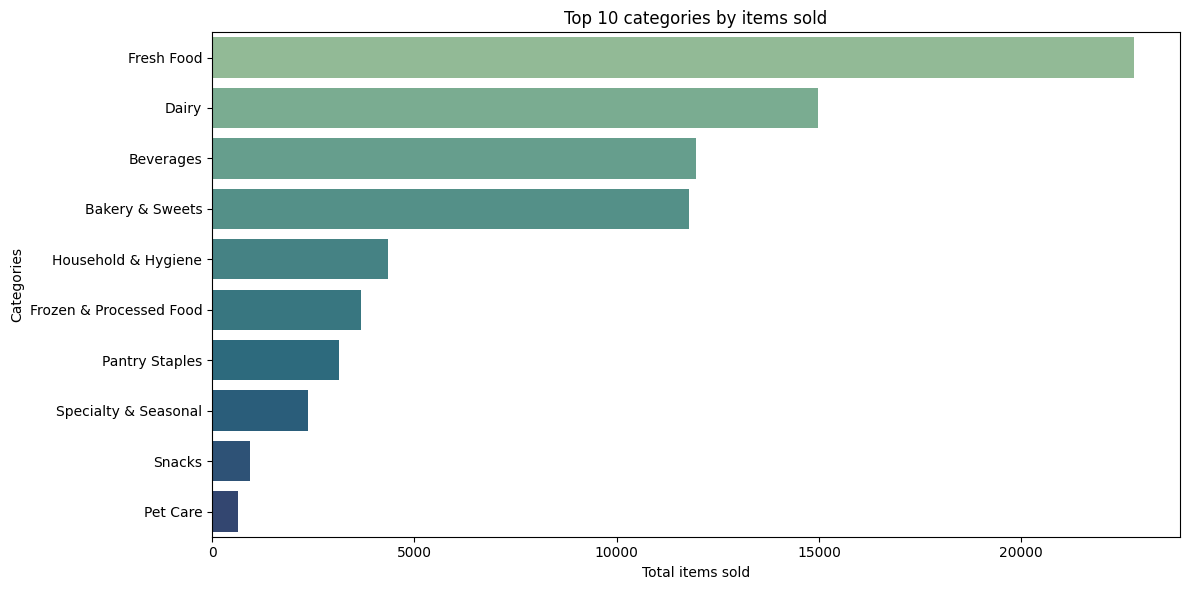

Top-selling categories 
                         items
Category                      
Fresh Food               22786
Dairy                    14968
Beverages                11963
Bakery & Sweets          11796
Household & Hygiene       4339
Frozen & Processed Food   3689
Pantry Staples            3134
Specialty & Seasonal      2360
Snacks                     928
Pet Care                   641 

Least-selling categories
                         items
Category                      
Personal Care              312
Pet Care                   641
Snacks                     928
Specialty & Seasonal      2360
Pantry Staples            3134
Frozen & Processed Food   3689
Household & Hygiene       4339
Bakery & Sweets          11796
Beverages                11963
Dairy                    14968


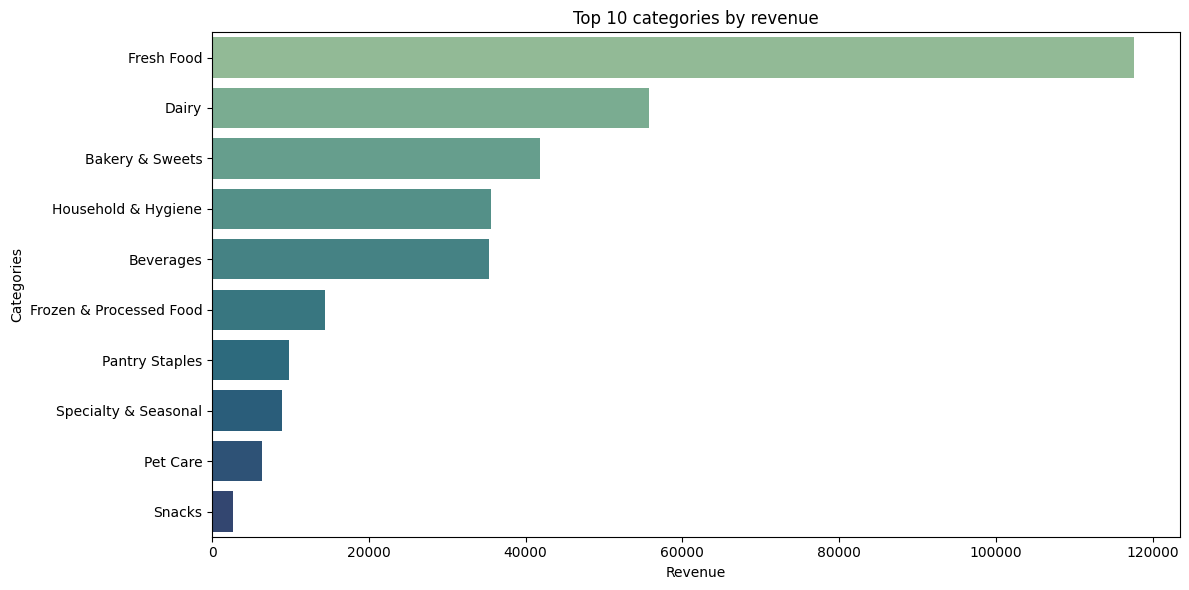

Top-selling categories 
                             sales
Category                          
Fresh Food               117566.20
Dairy                     55748.24
Bakery & Sweets           41780.78
Household & Hygiene       35555.16
Beverages                 35391.10
Frozen & Processed Food   14371.92
Pantry Staples             9857.45
Specialty & Seasonal       8864.30
Pet Care                   6425.80
Snacks                     2727.40 

Least-selling categories
                            sales
Category                         
Personal Care             2641.45
Snacks                    2727.40
Pet Care                  6425.80
Specialty & Seasonal      8864.30
Pantry Staples            9857.45
Frozen & Processed Food  14371.92
Beverages                35391.10
Household & Hygiene      35555.16
Bakery & Sweets          41780.78
Dairy                    55748.24


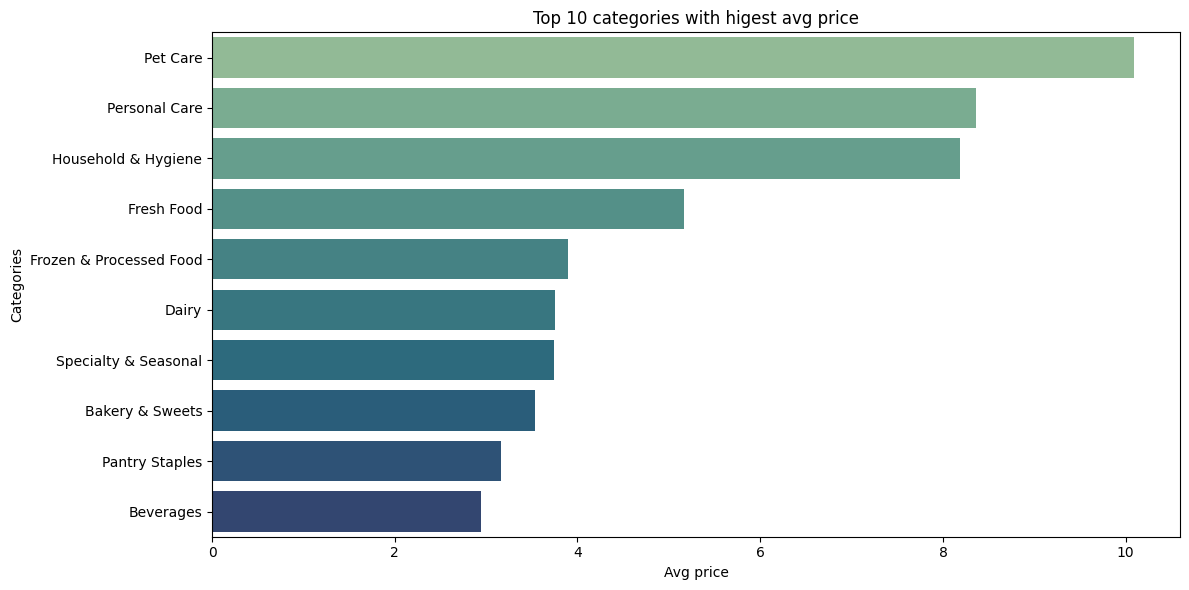

Top-selling categories 
                             price
Category                          
Pet Care                 10.089970
Personal Care             8.357643
Household & Hygiene       8.191337
Fresh Food                5.162809
Frozen & Processed Food   3.899152
Dairy                     3.753514
Specialty & Seasonal      3.740641
Bakery & Sweets           3.532947
Pantry Staples            3.162749
Beverages                 2.948519 

Least-selling categories
                            price
Category                         
Snacks                   2.770339
Beverages                2.948519
Pantry Staples           3.162749
Bakery & Sweets          3.532947
Specialty & Seasonal     3.740641
Dairy                    3.753514
Frozen & Processed Food  3.899152
Fresh Food               5.162809
Household & Hygiene      8.191337
Personal Care            8.357643


In [32]:
bar_h(top_cat_sold, 'items', 'Category','Top 10 categories by items sold', 'Total items sold', 'Categories' )
print(f"Top-selling categories \n{top_cat_sold} \n\nLeast-selling categories\n{bottom_cat_sold}")

bar_h(top_cat_revenue, 'sales', 'Category','Top 10 categories by revenue', 'Revenue', 'Categories' )
print(f"Top-selling categories \n{top_cat_revenue} \n\nLeast-selling categories\n{bottom_cat_revenue}")

bar_h(top_cat_price, 'price', 'Category','Top 10 categories with higest avg price', 'Avg price', 'Categories' )
print(f"Top-selling categories \n{top_cat_price} \n\nLeast-selling categories\n{bottom_cat_price}")


* **Về số lượng**: Fresh Food và Dairy dẫn đầu thị trường với hơn 15,000 đơn vị bán ra, trong khi Pet Care và Snacks có số lượng thấp nhất.

* **Về doanh thu**: Fresh Food tạo ra doanh thu vượt trội (>100,000), theo sau là Dairy và Bakery & Sweets, các danh mục còn lại đều dưới 40,000.

* **Về giá trung bình**: Pet Care, Personal Care và Household & Hygiene có giá cao nhất (>8), trong khi Beverages và Pantry Staples có giá thấp nhất (<4).

## Product Level

In [33]:
## Top products sold & revenue
products_items_sold = df.groupby('productName').agg(
            {'items': 'sum'}).sort_values(by = 'items', ascending=False)
products_revenues_sold = df.groupby('productName').agg(
            {'sales': 'sum'}).sort_values(by = 'sales', ascending=False)
products_price = df.groupby('productName').agg(
            {'price': 'mean'}).sort_values(by = 'price', ascending=False)

top_products_sold = products_items_sold.head(10)
top_products_revenue = products_revenues_sold.head(10)
top_products_price = products_price.head(10)

bottom_products_sold = products_items_sold.tail(10).sort_values(by = 'items')
bottom_products_revenue = products_revenues_sold.tail(10).sort_values(by = 'sales')
bottom_products_price = products_price.tail(10).sort_values(by = 'price')

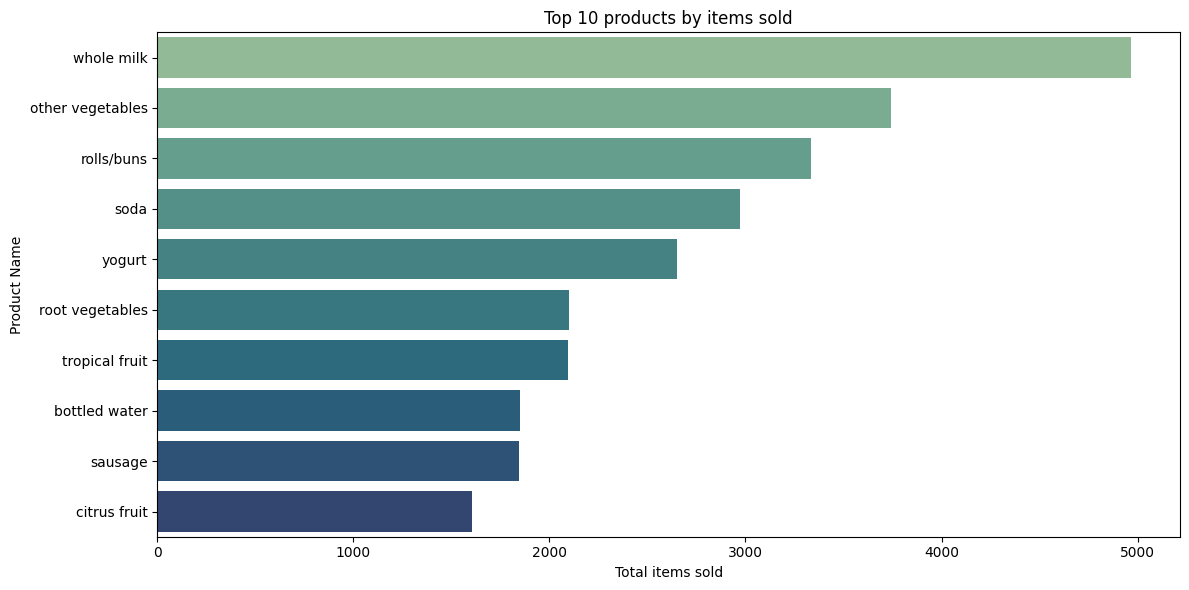

Top-selling products 
                  items
productName            
whole milk         4968
other vegetables   3743
rolls/buns         3332
soda               2970
yogurt             2650
root vegetables    2102
tropical fruit     2094
bottled water      1851
sausage            1846
citrus fruit       1605 

Least-selling products
                       items
productName                 
kitchen utensil            1
preservation products      2
bags                       5
make up remover            7
baby cosmetics             8
salad dressing            10
toilet cleaner            11
rubbing alcohol           11
frozen chicken            13
whisky                    16


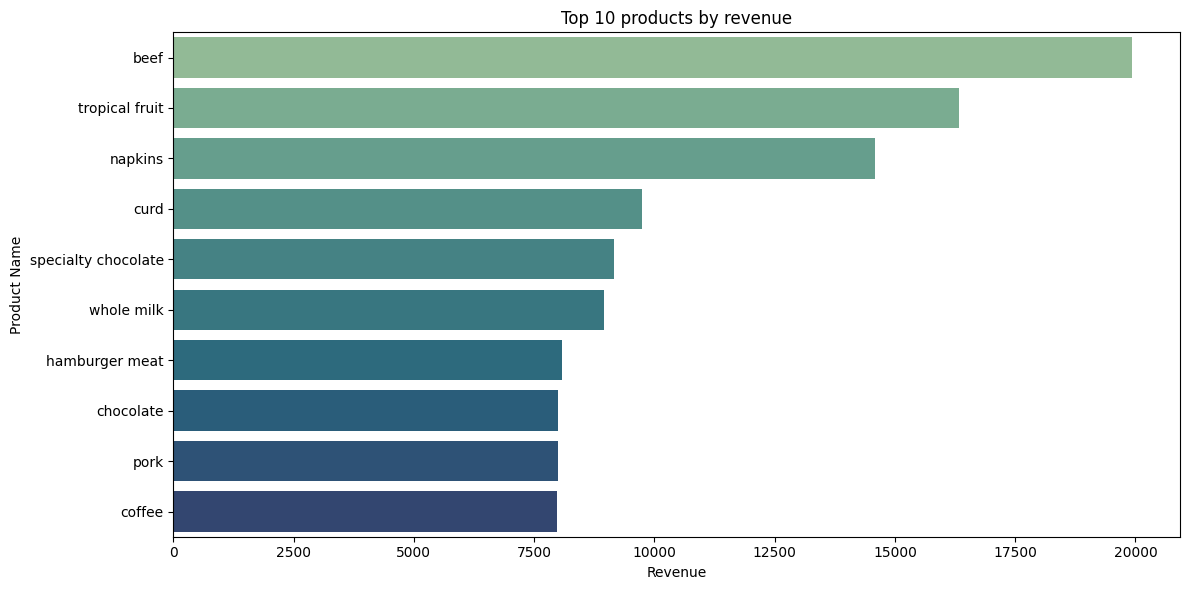

Top-selling products 
                       sales
productName                 
beef                 19929.0
tropical fruit       16333.2
napkins              14584.2
curd                  9731.4
specialty chocolate   9155.6
whole milk            8942.4
hamburger meat        8081.1
chocolate             7992.5
pork                  7984.8
coffee                7973.0 

Least-selling products
                       sales
productName                 
kitchen utensil          8.1
preservation products   13.5
make up remover         23.8
rubbing alcohol         27.5
frozen chicken          45.5
snack products          49.5
decalcifier             50.4
tidbits                 51.7
toilet cleaner          53.9
salad dressing          59.0


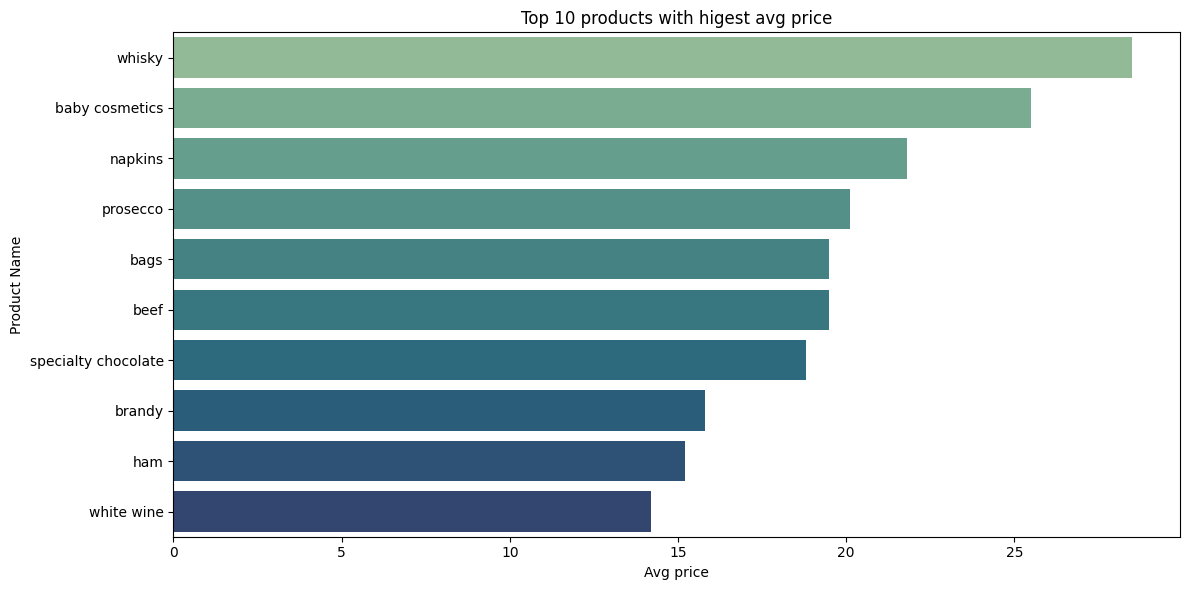

Top-selling products 
                     price
productName               
whisky                28.5
baby cosmetics        25.5
napkins               21.8
prosecco              20.1
bags                  19.5
beef                  19.5
specialty chocolate   18.8
brandy                15.8
ham                   15.2
white wine            14.2 

Least-selling products
                       price
productName                 
white bread              0.3
bottled water            0.5
chewing gum              0.5
salty snack              0.5
Instant food products    0.6
salt                     0.7
brown bread              0.8
other vegetables         0.8
soda                     0.8
snack products           0.9


In [34]:
bar_h(top_products_sold, 'items', 'productName','Top 10 products by items sold', 'Total items sold', 'Product Name' )
print(f"Top-selling products \n{top_products_sold} \n\nLeast-selling products\n{bottom_products_sold}")

bar_h(top_products_revenue, 'sales', 'productName','Top 10 products by revenue', 'Revenue', 'Product Name' )
print(f"Top-selling products \n{top_products_revenue} \n\nLeast-selling products\n{bottom_products_revenue}")


bar_h(top_products_price, 'price', 'productName','Top 10 products with higest avg price', 'Avg price', 'Product Name' )
print(f"Top-selling products \n{top_products_price} \n\nLeast-selling products\n{bottom_products_price}")


* **Về số lượng bán**: Whole milk dẫn đầu (~5,000 đơn vị), theo sau bởi other vegetables và rolls/buns, trong khi citrus fruit có số lượng thấp nhất (~2,000 đơn vị).

* **Về doanh thu**: Beef và tropical fruit tạo doanh thu cao nhất (>15,000), các sản phẩm như coffee, pork và chocolate đều tạo doanh thu tương đương nhau (~8,000).

* **Về giá trung bình**: Whisky và baby cosmetics có giá cao nhất (>25), các sản phẩm rượu (brandy, white wine) và đồ cao cấp (specialty chocolate, beef) có giá trung bình từ 15-20.

## Customer Level

In [35]:
top_customer_sold = df.groupby('Member_number').agg(
            {'items': 'sum'}).sort_values(by = 'items', ascending=False).reset_index().head(10)
top_customer_revenue = df.groupby('Member_number').agg(
            {'sales': 'sum'}).sort_values(by = 'sales', ascending=False).reset_index().head(10)
avg_customer_price = df.groupby('Member_number').agg(
            {'price': 'mean'}).sort_values(by = 'price', ascending=False).reset_index().head(10)

In [36]:
top_customer_sold['Member_number'] = top_customer_sold['Member_number'].astype(str)
top_customer_revenue['Member_number'] = top_customer_revenue['Member_number'].astype(str)
avg_customer_price['Member_number'] = top_customer_revenue['Member_number'].astype(str)

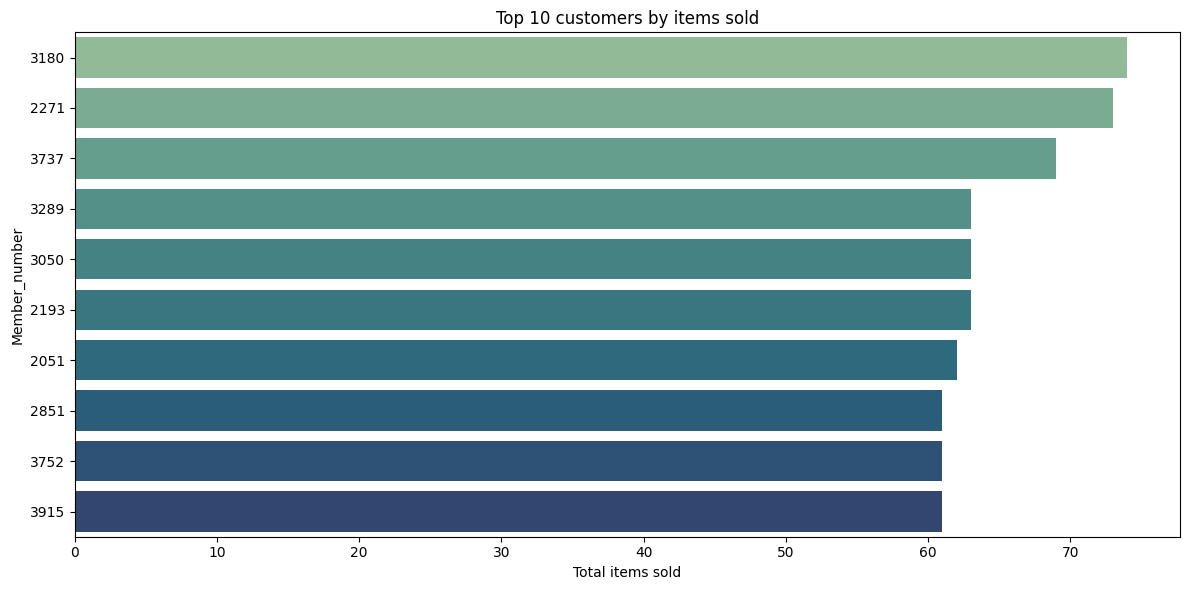

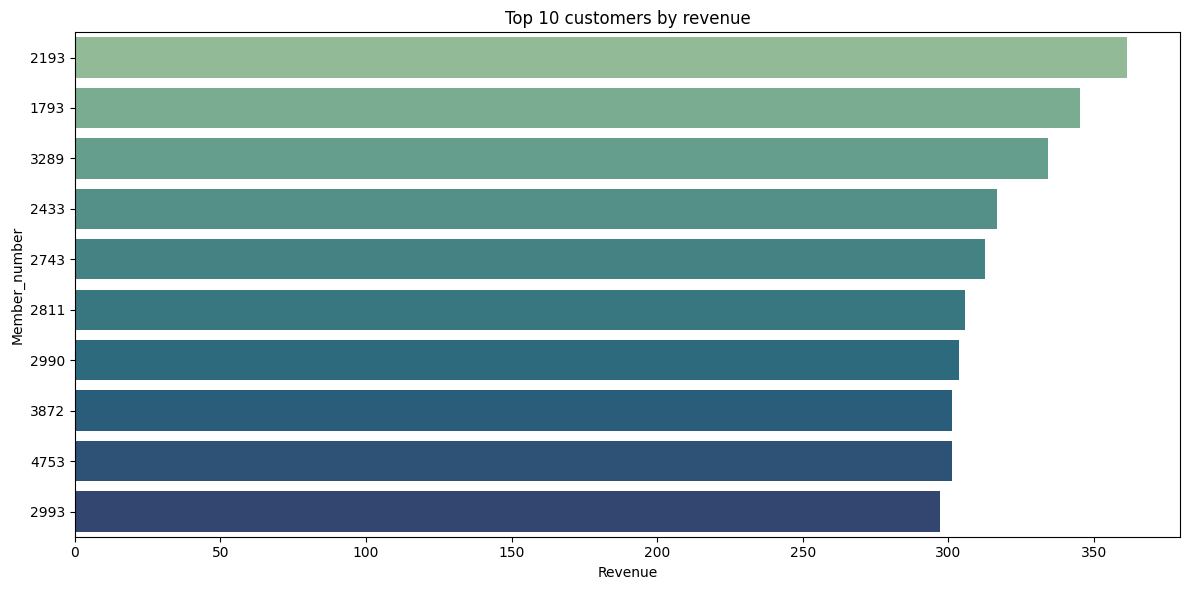

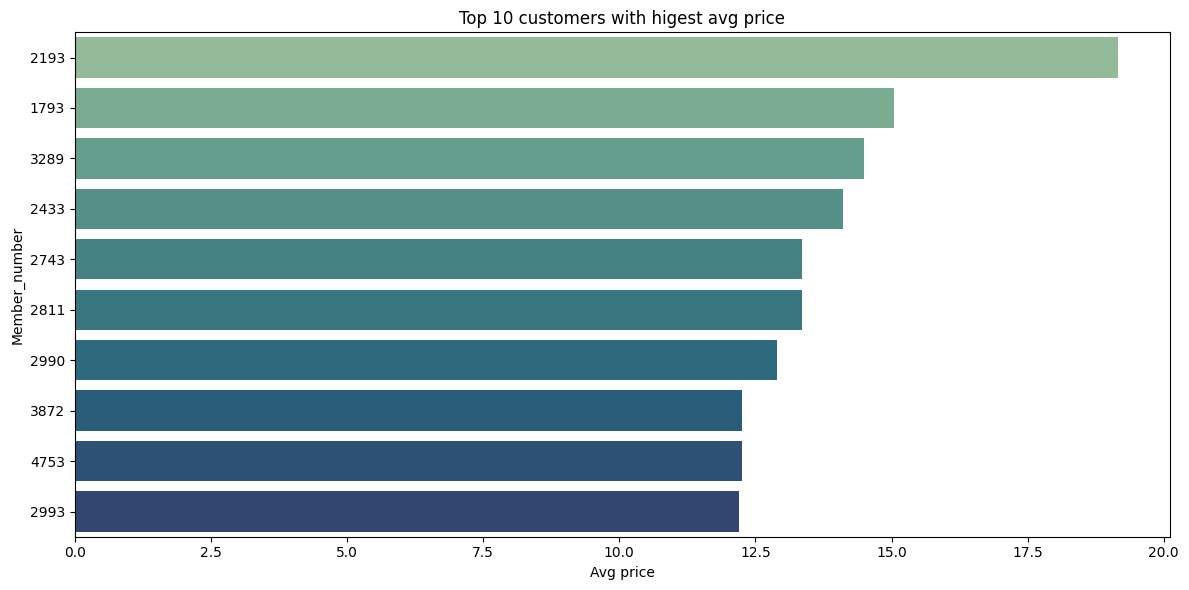

In [37]:
bar_h(top_customer_sold, 'items', 'Member_number','Top 10 customers by items sold', 'Total items sold', 'Member_number' )
bar_h(top_customer_revenue, 'sales', 'Member_number','Top 10 customers by revenue', 'Revenue', 'Member_number' )
bar_h(avg_customer_price, 'price', 'Member_number','Top 10 customers with higest avg price', 'Avg price', 'Member_number' )

* **Về số lượng mua**: Khách hàng số 3180 và 2271 mua nhiều nhất (>70 đơn vị), các khách hàng còn lại đều mua từ 55-65 đơn vị, khá đồng đều.

* **Về doanh thu**: Khách hàng 2193 và 1793 chi tiêu nhiều nhất (>300), trong khi khách hàng 2993 có mức chi tiêu thấp nhất trong top 10 (~250).

* **Về giá trung bình**: Khách hàng 2193 có xu hướng mua hàng đắt nhất (>17.5), tiếp theo là khách 1793 và 3289 (>15), các khách còn lại có mức giá trung bình từ 12-15.

# Calculate RFM

In [38]:
max_date = df['Date'].max()

Recency = lambda x : (max_date - x.max()).days
Frequency  = lambda x: x.count()
Monetary = lambda x : round(sum(x), 2)


df_RFM = df.groupby('Member_number').agg({'Date': Recency,
                                        'Member_number': Frequency,
                                        'sales': Monetary })

# Rename the columns of DataFrame
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']
# Descending Sorting
df_RFM = df_RFM.sort_values('Monetary', ascending=False)

df_RFM.head()                                      

,Recency,Frequency,Monetary
Member_number,,,
2193,91,27,361.45
1793,26,25,345.10
3289,4,29,334.15
2433,3,30,316.81
2743,142,17,312.46


Giải thích cách tính RFM từ dữ liệu giao dịch:

1. Recency (Độ gần đây):
- Tính số ngày từ lần mua hàng cuối cùng đến ngày hiện tại (max_date)
- Ví dụ: Nếu khách hàng mua lần cuối vào 25/12/2015 và max_date là 31/12/2015, Recency = 6 ngày

2. Frequency (Tần suất):
- Đếm tổng số lần khách hàng thực hiện giao dịch
- Ví dụ: Nếu khách hàng có 10 hóa đơn khác nhau, Frequency = 10

3. Monetary (Giá trị):
- Tổng số tiền khách hàng đã chi tiêu (cột sales)
- Ví dụ: Tổng giá trị các đơn hàng của khách = 500 + 300 + 200 = 1,000

Các giá trị này được tính cho từng khách hàng (Member_number) và sắp xếp theo Monetary giảm dần để xem khách hàng nào có giá trị cao nhất.

In [39]:
df_RFM.shape

(3898, 3)

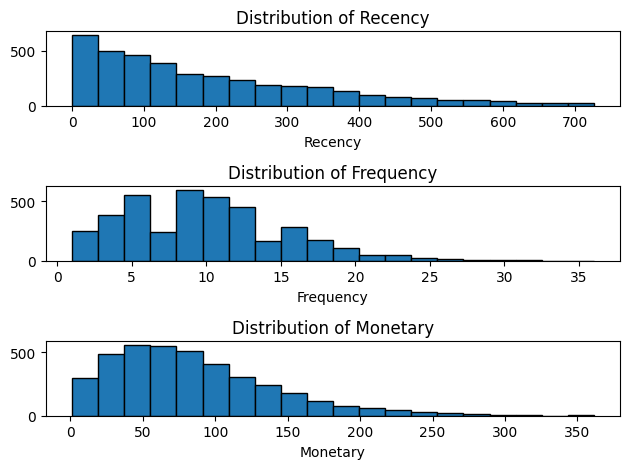

In [40]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.hist(df_RFM['Recency'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.hist(df_RFM['Frequency'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.hist(df_RFM['Monetary'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

* **Recency**: Phần lớn khách hàng có giao dịch gần đây (0-200 ngày), số lượng giảm dần với những khách hàng có giao dịch xa hơn (>300 ngày).

* **Frequency**: Đa số khách hàng có tần suất mua hàng từ 5-15 lần, với đỉnh cao nhất ở khoảng 10 lần, rất ít khách hàng có trên 25 lần mua.

* **Monetary**: Phân phối nghiêng phải, tập trung chủ yếu ở mức chi tiêu 25-125 đơn vị, số lượng khách hàng giảm mạnh ở mức chi tiêu cao (>200).

In [41]:
# Create labels for Recency, Frequency, Monetary
r_labels = range(4, 0, -1) 
f_labels = range(1, 5)
m_labels = range(1, 5)

In [42]:
# Assign these labels to 4 equal percentile groups
r_groups = pd.qcut(df_RFM['Recency'].rank(method='first'), q=4, labels=r_labels)

f_groups = pd.qcut(df_RFM['Frequency'].rank(method='first'), q=4, labels=f_labels)

m_groups = pd.qcut(df_RFM['Monetary'].rank(method='first'), q=4, labels=m_labels)

Tiến hành chia dữ liệu RFM thành 4 nhóm bằng nhau (mỗi nhóm 25% số lượng khách hàng) cho mỗi chỉ số Recency, Frequency và Monetary

In [43]:
df_RFM = df_RFM.assign(R = r_groups.values, F = f_groups.values,  M = m_groups.values)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M
Member_number,,,,,,
2193,91,27,361.45,3,4,4
1793,26,25,345.10,4,4,4
3289,4,29,334.15,4,4,4
2433,3,30,316.81,4,4,4
2743,142,17,312.46,2,4,4


In [44]:
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_RFM['RFM_Segment'] = df_RFM.apply(join_rfm, axis=1)

In [45]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment
Member_number,,,,,,,
2193,91,27,361.45,3,4,4,344
1793,26,25,345.10,4,4,4,444
3289,4,29,334.15,4,4,4,444
2433,3,30,316.81,4,4,4,444
2743,142,17,312.46,2,4,4,244


In [46]:
rfm_count_unique = df_RFM.groupby('RFM_Segment')['RFM_Segment'].nunique()
print(rfm_count_unique.sum())

60


In [47]:
# Calculate RFM_Score
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
Member_number,,,,,,,,
2193,91,27,361.45,3,4,4,344,11
1793,26,25,345.10,4,4,4,444,12
3289,4,29,334.15,4,4,4,444,12
2433,3,30,316.81,4,4,4,444,12
2743,142,17,312.46,2,4,4,244,10


=> Tạo cột RFM_Score, RFM_Segment cho việc phân cụm 

In [48]:
df_RFM.reset_index().to_csv('df_RFM.csv', index= False)

**=> Lưu tất cả data RFM vào df_RFM.csv và sử dụng trong các thuật toán phân cụm, model phân cụm,..**

In [49]:
df_RFM['RFM_Score'].unique()

array([11, 12, 10,  9,  8,  7,  6,  5,  4,  3], dtype=int64)

=> Các RFM_Score có thể là: **11, 12, 10,  9,  8,  7,  6,  5,  4,  3**